<a href="https://colab.research.google.com/github/Vamshi13212/Assignments_here/blob/main/Chennai_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# importing all the libraries for Exploratory Data Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# loading the Dataset using pandas
# looking at all columns of given dataset
df = pd.read_csv('/content/train-chennai-sale.csv')
pd.set_option('display.max_columns', None)
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


# First look observations


####   Observations - 1
1. Age of Property can be induced from DATE_SALE, DATE_BUILD like DATE_BUILD - DATE_SALE
2. QS_ROOMS, QS_BATHROOM, QS_BEDROOM, QS_OVERALL (are Masked DATA)
3. PRT_ID, COMMMIS, REG_FEE not important features, as PRD_ID is unique feature, and rest two values COMMMIS, REG_FEE we get to know only at the time of registration, before sale we are not known,  can be dropped. here we are trying to predict before sale (purchase only)



In [5]:
# finding the Shape of the DataFrame
df.shape

(7109, 22)

**1**.DataFrame contains 7109 rows, and 22 Features

In [6]:
# Basic infermation about the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

####   Observations - 2
1. Missing Values - N_BEDROOM, N_BATHROOM, QS_OVERALL 
   N_BEDROOM, N_BATHROOM -> Can be induced from median 
   and QS_OVERALL -> can also be avg of other masked QS columns mean
2. DATE_SALE, DATE_BUILD should be date time format, N_BEDROOM, N_BATHROOM must be integer, 
3. PRT_ID, COMMMIS, REG_FEE can be deleted.


# CLEANING THE DATA ####

In [7]:
# we can remove the unwanted features then go by coulmn wise clean the data
df1 = df.copy()
df1.drop(['PRT_ID', 'COMMIS', 'REG_FEE'], axis=1, inplace=True)
df1.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250


In [8]:
df1.isnull().sum()


AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
SALES_PRICE       0
dtype: int64

In [9]:
# printing the shape of the DataFrame
df1.shape

(7109, 19)

In [10]:
# Checking the Null values
df1.isnull().sum()
# 3 Features having the Null values

AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
SALES_PRICE       0
dtype: int64

#### Filling the missing values

In [11]:
# Filling the missing values with mode
df1['N_BEDROOM'].fillna(df1['N_BEDROOM'].mode()[0], inplace=True)
df1['N_BATHROOM'].fillna(df1['N_BATHROOM'].mode()[0], inplace=True)
df1['QS_OVERALL'].fillna(df1['QS_OVERALL'].mean(), inplace=True)
df1.isnull().sum()


AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
SALES_PRICE      0
dtype: int64

#### Spelling_Mistake check and correction to common values

In [12]:
df1['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [13]:
df1['SALE_COND'].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [14]:
df1['PARK_FACIL'].unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [15]:
df1['BUILDTYPE'].unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [16]:
df1['UTILITY_AVAIL'].unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [17]:
df1['STREET'].unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [18]:
df1['MZZONE'].unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

In [19]:
df1 = df1.replace({'AREA':{'Karapakam':'Karapakkam', 
                         'Ana Nagar':'Anna Nagar',
                         'Ann Nagar':'Anna Nagar',
                         'Adyr':'Adyar',
                         'Velchery':'Velachery',
                         'Chrompt':'Chrompet',
                         'Chormpet':'Chrompet',
                         'Chrmpet':'Chrompet',
                         'KKNagar':'KK Nagar',
                         'TNagar':'T Nagar'
                         },
                 'SALE_COND':{'Ab  Normaal':'AbNormal','Ab Normal':'AbNormal','PartiaLl':'Partial','Partiall':'Partial','Adj Land':'AdjLand'},
                 'PARK_FACIL':{'Noo':'No'},
                 'BUILDTYPE':{'Comercial':'Commercial','Other':'Others'},
                 'UTILITY_AVAIL':{'All Pub':'AllPub','NoSewr ':'NoSeWa'},
                 'STREET':{'Pavd':'Paved','NoAccess':'No Access'}
                         })


In [20]:
df1['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

In [21]:
df1['SALE_COND'].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale'],
      dtype=object)

In [22]:
df1['PARK_FACIL'].unique()

array(['Yes', 'No'], dtype=object)

In [23]:
df1['BUILDTYPE'].unique()

array(['Commercial', 'Others', 'House'], dtype=object)

In [24]:
df1['UTILITY_AVAIL'].unique()

array(['AllPub', 'ELO', 'NoSeWa'], dtype=object)

In [25]:
df1['STREET'].unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

In [26]:
df1['MZZONE'].unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

In [27]:
#Creating House age column by using house sold date and house build date,
#Dropping DATE_SALE and DATE_BUILD columns as there are no feature outcome of these 2 columns
df1['HOUSE_AGE']=pd.to_datetime(df['DATE_SALE']).apply(lambda x: x.year) - pd.to_datetime(df['DATE_BUILD']).apply(lambda x: x.year)
df1 = df1.drop(columns=['DATE_SALE', 'DATE_BUILD'])
df1.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,HOUSE_AGE
0,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,44
1,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,11
2,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,20
3,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSeWa,Paved,I,4.7,3.9,3.6,4.010,9630290,22
4,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,30


In [28]:
df1=df1.drop_duplicates()

In [29]:
df1.dtypes


AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
SALES_PRICE        int64
HOUSE_AGE          int64
dtype: object

In [30]:
df1.N_BEDROOM = df1.N_BEDROOM.astype('int64')
df1.N_BATHROOM = df1.N_BATHROOM.astype('int64')


In [31]:
df1.dtypes

AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM          int64
N_BATHROOM         int64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
SALES_PRICE        int64
HOUSE_AGE          int64
dtype: object

In [32]:
df1.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'SALES_PRICE', 'HOUSE_AGE'],
      dtype='object')

In [33]:
df1=df1.reindex(columns=['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'HOUSE_AGE','SALES_PRICE'])
df1.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,HOUSE_AGE,SALES_PRICE
0,Karapakkam,1004,131,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,44,7600000
1,Anna Nagar,1986,26,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,11,21717770
2,Adyar,909,70,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,20,13159200
3,Velachery,1855,14,3,2,5,Family,No,Others,NoSeWa,Paved,I,4.7,3.9,3.6,4.010,22,9630290
4,Karapakkam,1226,84,1,1,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,30,7406250


# EDA - FIRST INSIGHTS - From below - General remarks how data distributed- based on the below maps key points noted here

1. Which area cotains most of the houses - refering AREA column, there is as order in the data, it means which area most of the houses sold in our dataset, which area list no of houses, just for inferring purpose
2.Same distribution for sales condition,utility avail,park facility,build type,
3.street  - majority data points belongs to paved, than gravel, than no access
4.MZZONE - Majority settlements are residential only 
5.NBEDROOMS,NBATHROOM - majority belongs to 1 bedroom/bathrooms
6.NROOMS - BELL CURVE distribution values (2 3 4 5 6)
7.All ages of houses could be seen from 3 to 55 years old
8.from 500 to 2500 sqrft houses avbl




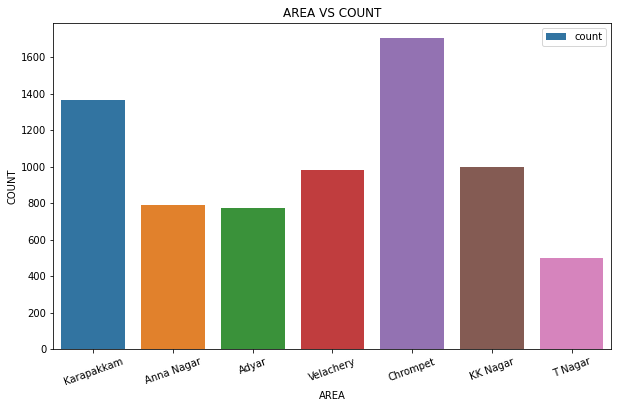

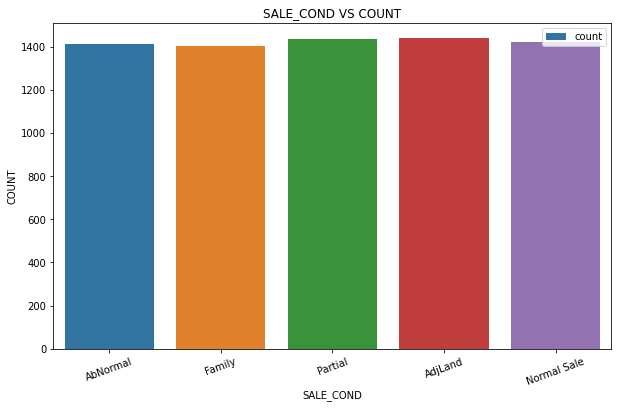

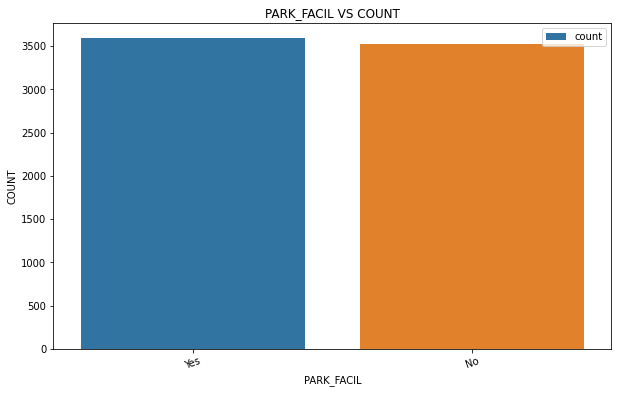

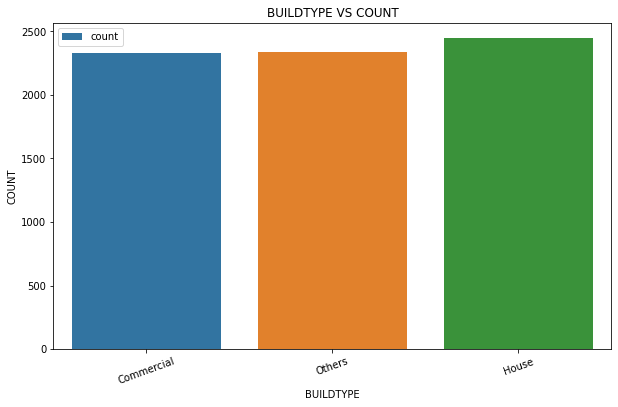

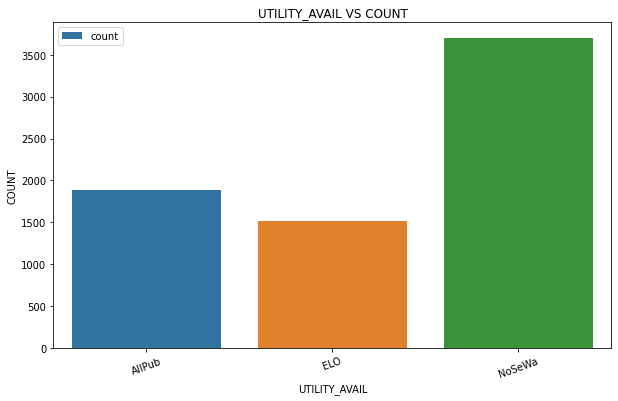

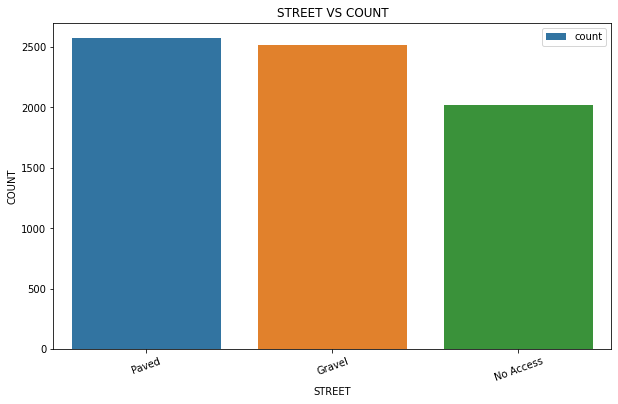

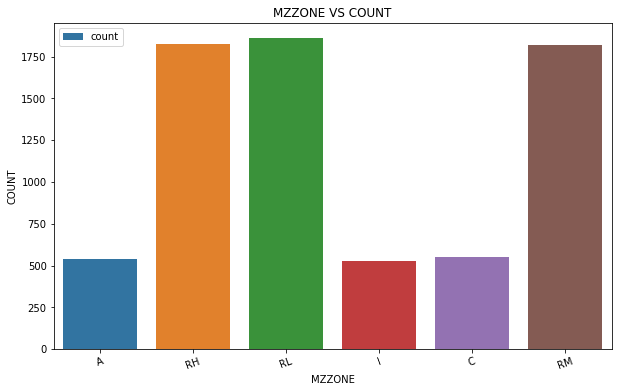

In [34]:
def feature_plot(dframe,col):
    f = plt.figure()
    f.set_figwidth(10)
    f.set_figheight(6)
    sns.countplot(data=dframe,x=col,label="count")
    plt.xlabel(col)
    plt.ylabel("COUNT")
    plt.title(col+" VS COUNT")
    plt.legend()
    plt.xticks(rotation=20)
    return plt.show()
for x in df1.select_dtypes(include=['object']).columns:
#for x in df1.columns: 
  feature_plot(df1,x)
  print('\n')
   

In [35]:
df1.select_dtypes(include=['int64','float']).columns


Index(['INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM',
       'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'HOUSE_AGE',
       'SALES_PRICE'],
      dtype='object')

In [131]:
df1.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,HOUSE_AGE,SALES_PRICE
count,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.636939,1.213110,3.688704,3.517471,3.507244,3.485300,3.503254,24.276270,1.089491e+07
std,457.410902,57.403110,0.802881,0.409534,1.019099,0.891972,0.897834,0.887266,0.525440,12.334164,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,14.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.503254,23.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.880000,34.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,55.000000,2.366734e+07


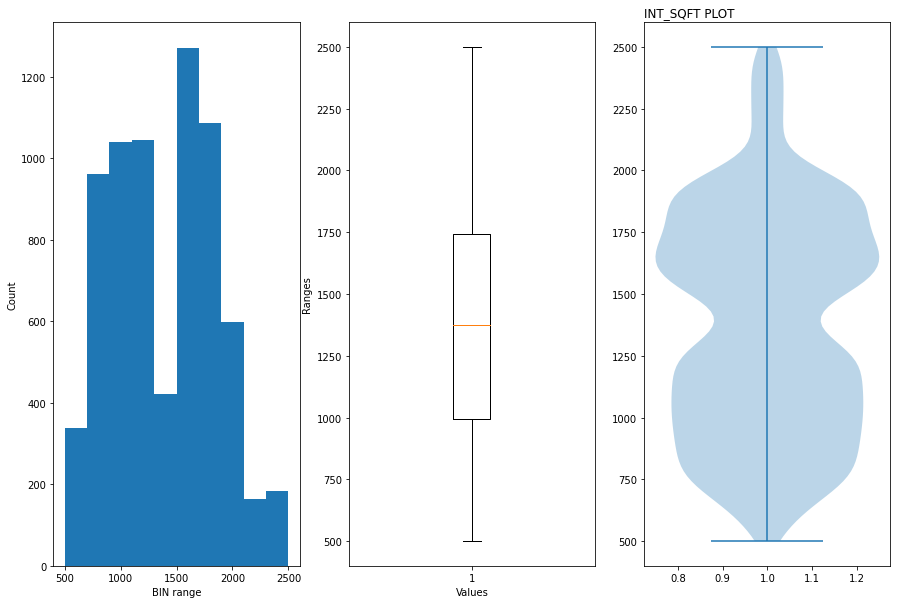

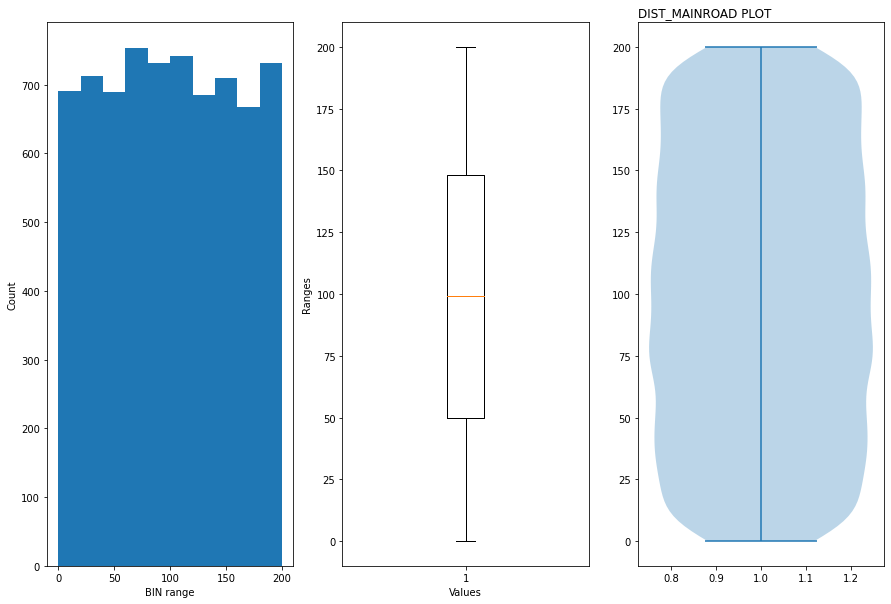

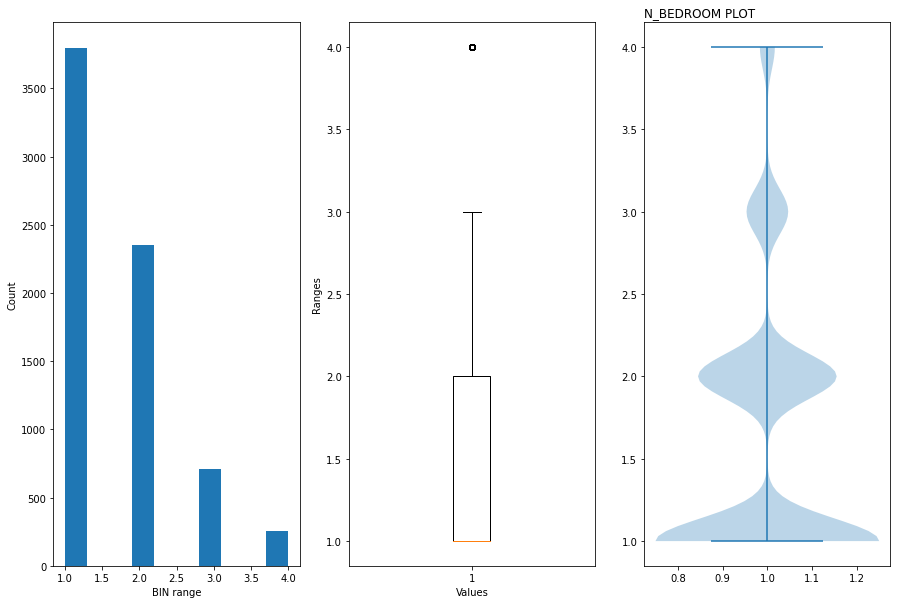

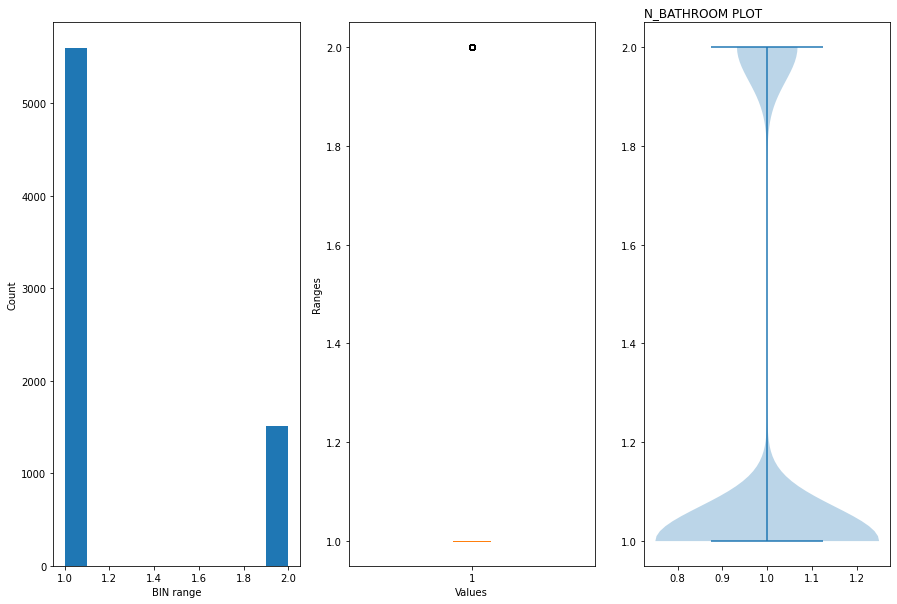

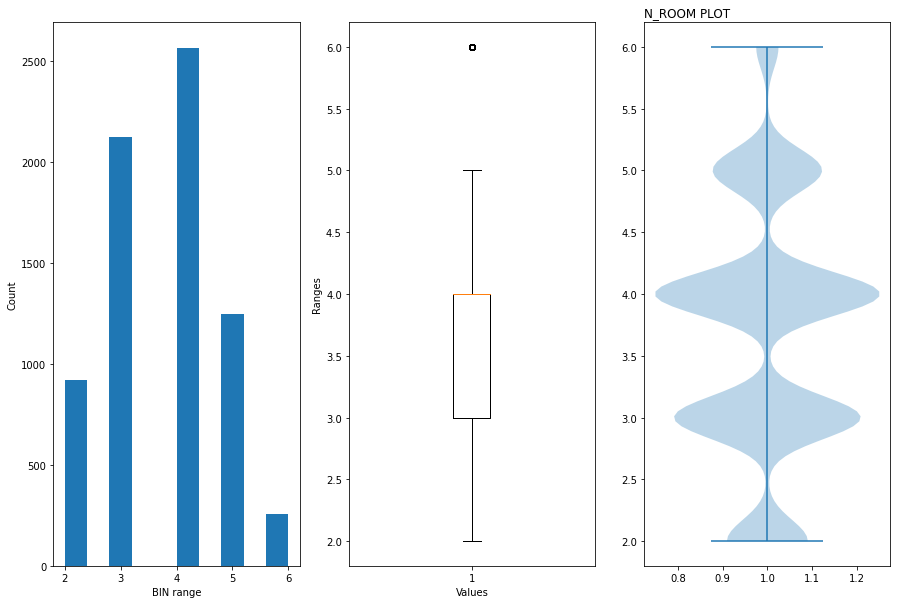

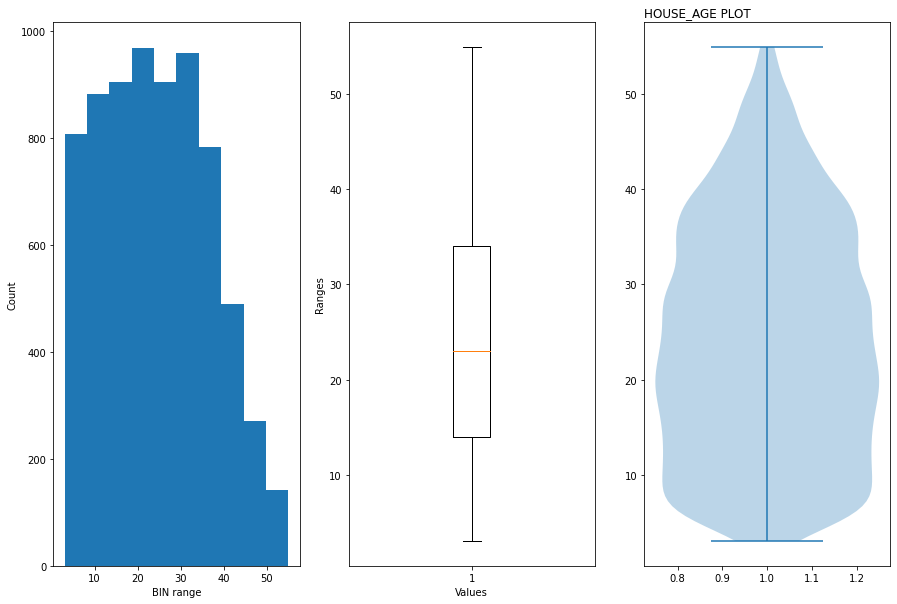

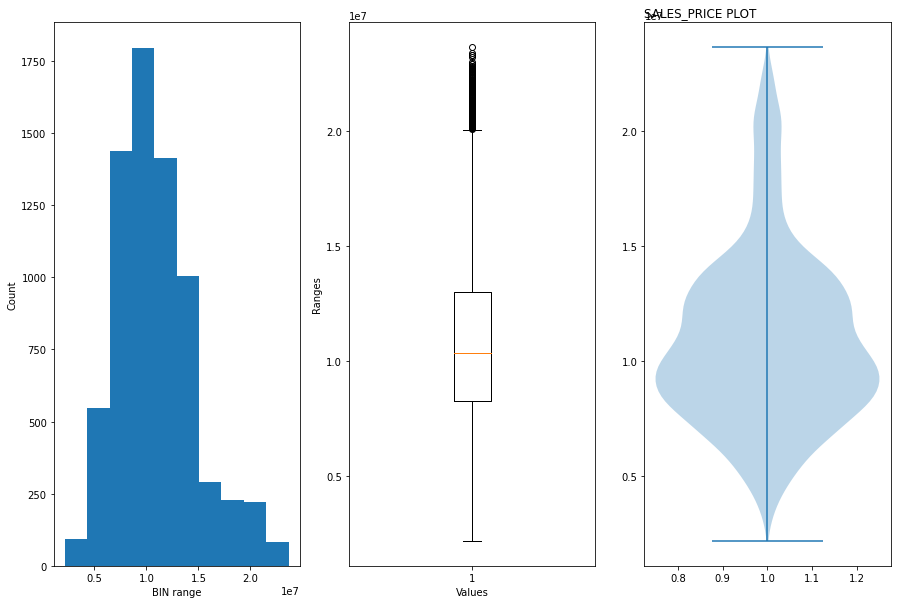

In [36]:
def cont_plot(dframe):
    fig,ax=plt.subplots(1,3)
    fig.set_figwidth(15)
    fig.set_figheight(10)
    ax[0].hist(dframe)
    ax[1].boxplot(dframe)
    ax[2].violinplot(dframe)
    ax[0].set_xlabel("BIN range")
    ax[0].set_ylabel("Count")
    ax[1].set_xlabel("Values")
    ax[1].set_ylabel("Ranges")
    plt.title(str(dframe.name)+" PLOT ",loc='left')
    return plt.show()
for x in ['INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM','HOUSE_AGE','SALES_PRICE']:
  cont_plot(df1[x])
  print('\n')

In [37]:
df1.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,HOUSE_AGE,SALES_PRICE
count,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.636939,1.213110,3.688704,3.517471,3.507244,3.485300,3.503254,24.276270,1.089491e+07
std,457.410902,57.403110,0.802881,0.409534,1.019099,0.891972,0.897834,0.887266,0.525440,12.334164,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,14.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.503254,23.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.880000,34.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,55.000000,2.366734e+07


# EDA - 2 nd INSIGHTS - Feature vs Target - based on the below maps key points noted here
1. AREA and SALES PRICE linear relationship, so important feature, so order is present, so we do label encoding, maintaining same order as per map 
2. SALE_COND with respect to SALES price no relationship at all, so we can delete the feature.
3. PARK_FACIL with respect to SALE_PRICE is linear, We need to do label encoding for the data
4. BUILD TYPE and SALES PRICE no linear relationship, we can do one hot encoding / we can do label as well
5. UTILITY_AVAIL with respect to SALES price no relationship at all, so we can delete the feature
6. STREET with respect to SALE_PRICE linear, We need to do label encoding for the data
7. MZZONE and SALES PRICE linear relationship, so important feature, so order is present, so we do label encoding, maintaining same order as per map 
8. INT_SQFT having linear relation ship with SALES price
9. DISTMAIN ROAD ,HOUSE AGEand all QS masked columns not make an important relation with SALES price, we can delete it
10. NBEDROOM,NBATHROOM,NROOM showing a good linear relation with sales price, we can use them remain.

Delete: SALE_COND, UTILITY_AVAIL,DISTMAIN ROAD ,HOUSE AGEand all QS masked columns






In [38]:
df1.select_dtypes(include=['object']).columns


Index(['AREA', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE'],
      dtype='object')

In [39]:
### Analysing the AREA Feature

result = df1.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')
result


,AREA,SALES_PRICE
4,Karapakkam,7.340100e+06
0,Adyar,9.185668e+06
2,Chrompet,1.001381e+07
6,Velachery,1.104735e+07
3,KK Nagar,1.269623e+07
1,Anna Nagar,1.516820e+07
5,T Nagar,1.561674e+07


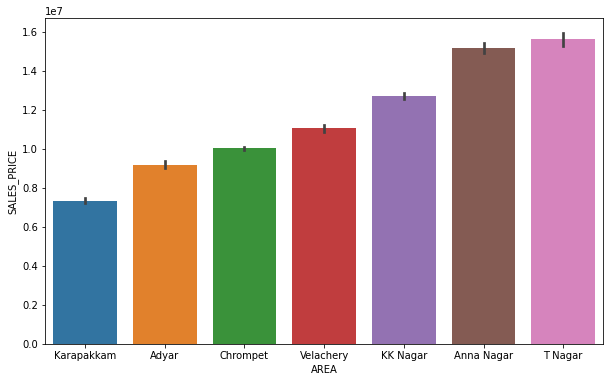

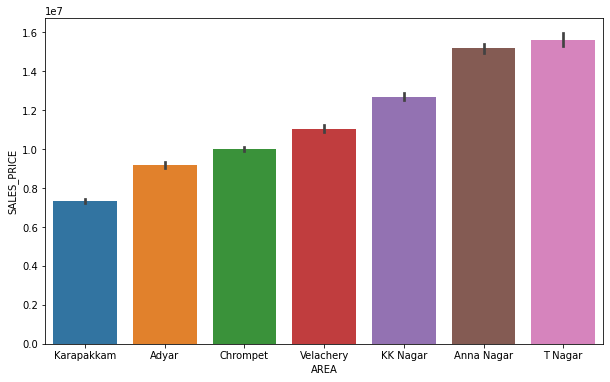

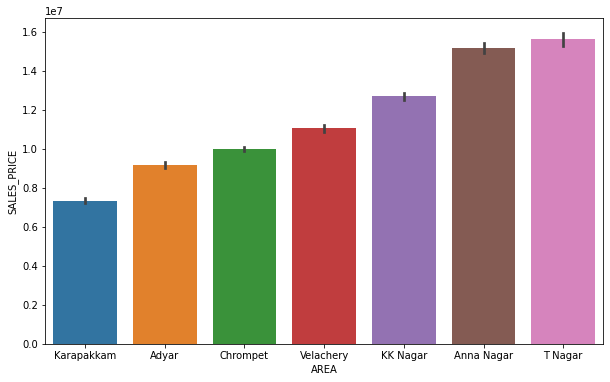

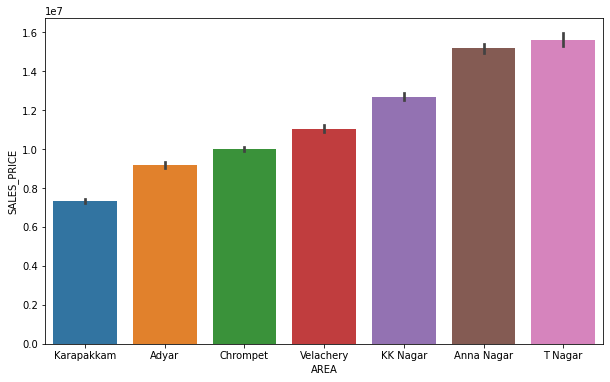

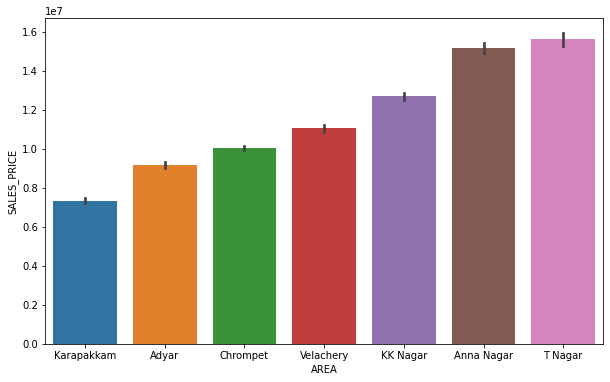

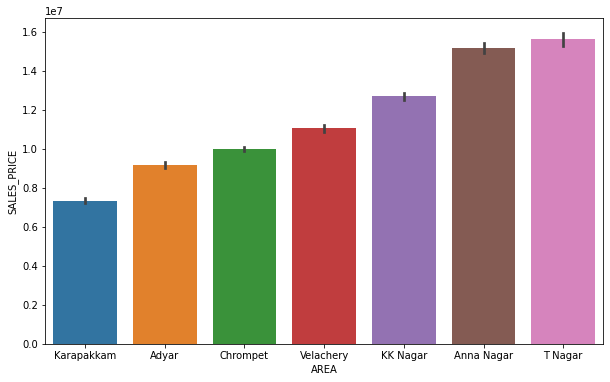

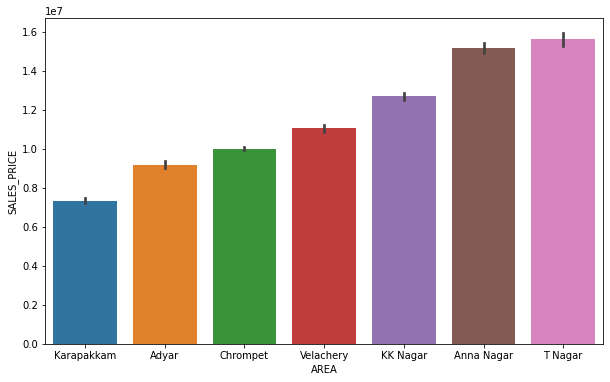

In [40]:
## Area when compared to Sales price
for x in ['AREA', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE']:

  plt.figure(figsize=(10, 6))
  result = df1.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')
  sns.barplot(x=df1['AREA'], y=df1['SALES_PRICE'], data=df1, order=result['AREA'])

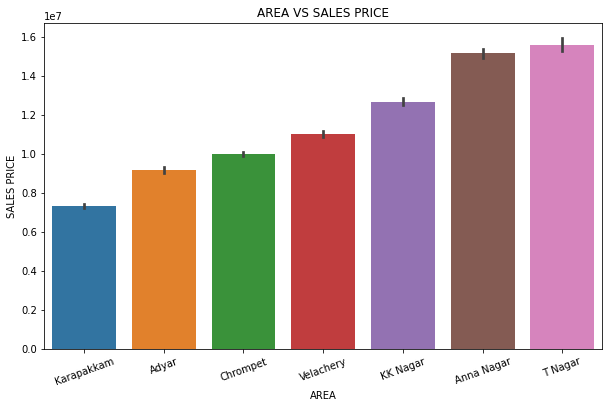

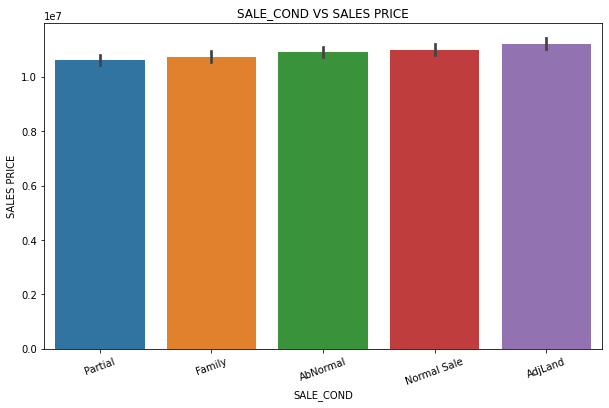

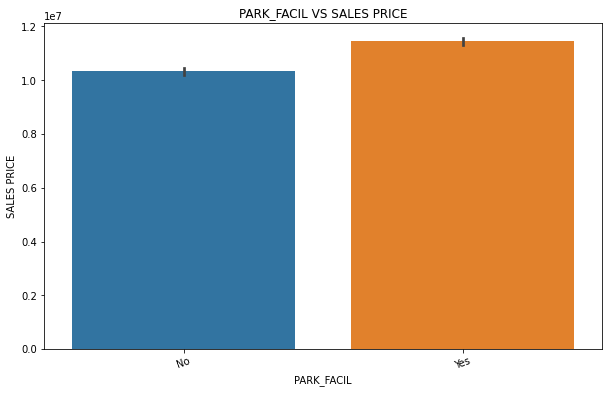

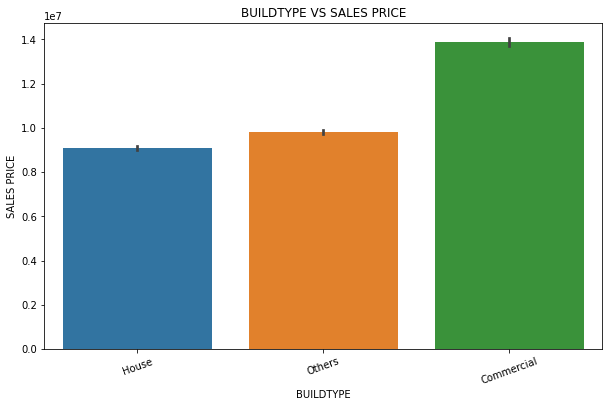

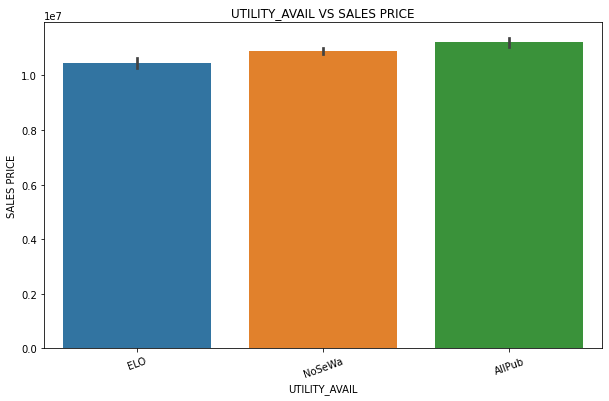

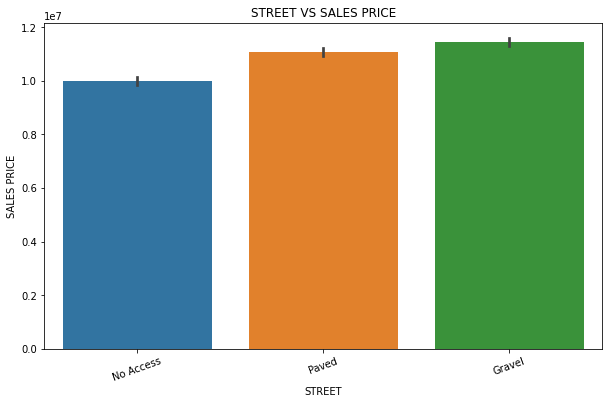

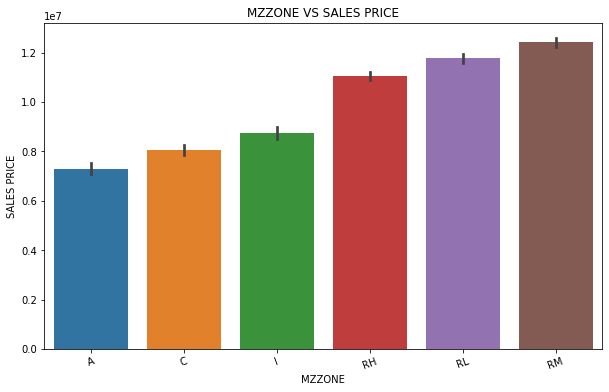

In [41]:
def feature_plot(dframe,col):
    f = plt.figure()
    f.set_figwidth(10)
    f.set_figheight(6)
    result = df1.groupby(col)['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')
    sns.barplot(x=df1[col], y=df1['SALES_PRICE'], data=df1, order=result[col])
    plt.xlabel(col)
    plt.ylabel("SALES PRICE")
    plt.title(col+" VS SALES PRICE")
    plt.xticks(rotation=20)
    return plt.show()
for x in df1.select_dtypes(include=['object']).columns:
#for x in df1.columns: 
  feature_plot(df1,x)
  print('\n')

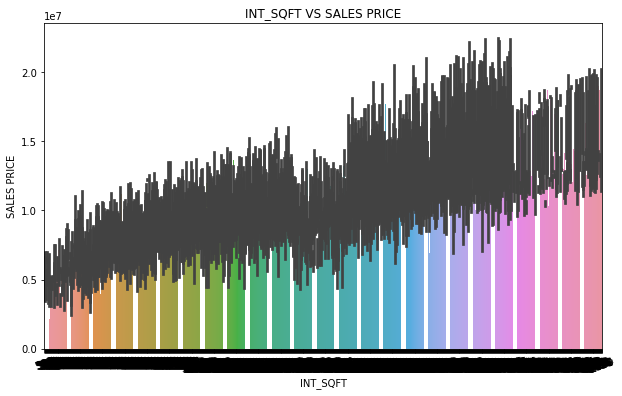

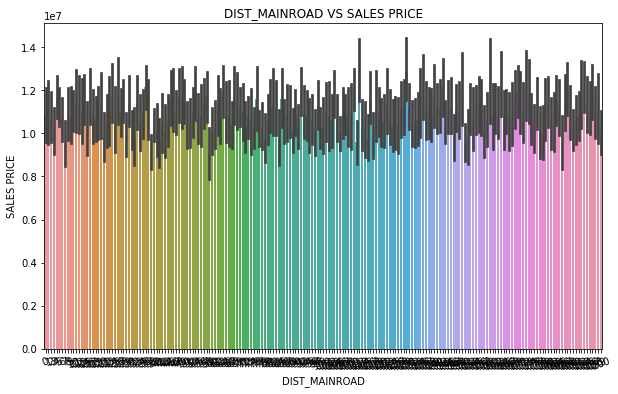

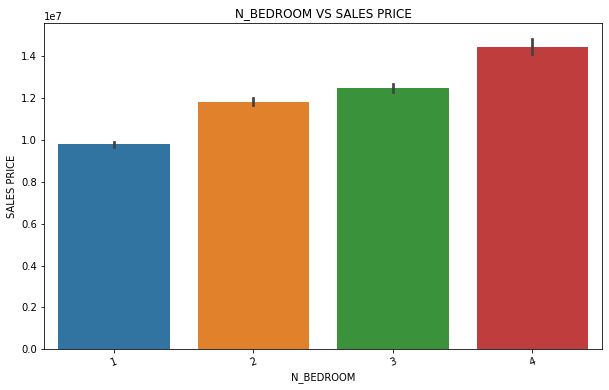

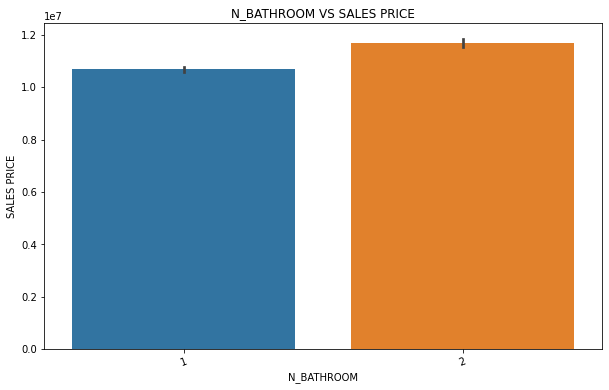

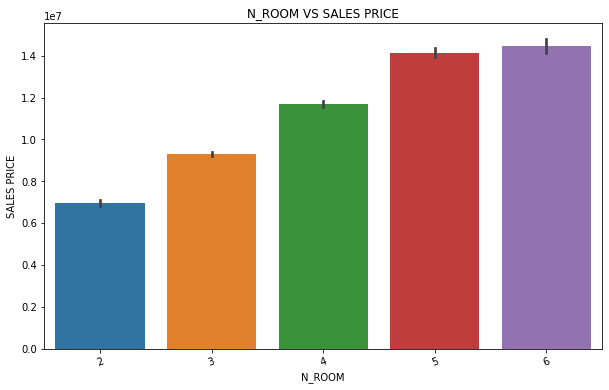

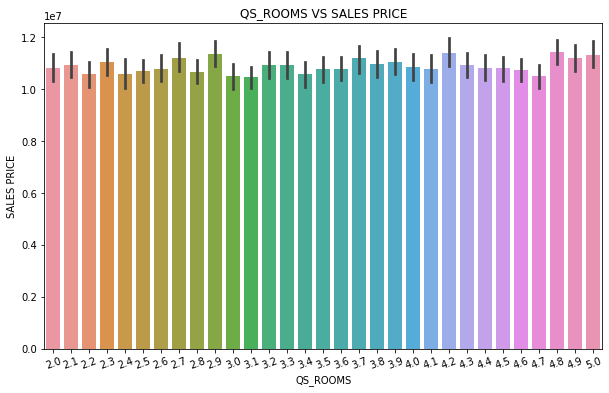

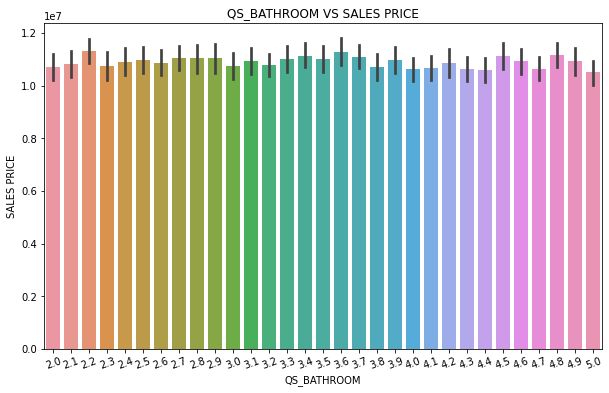

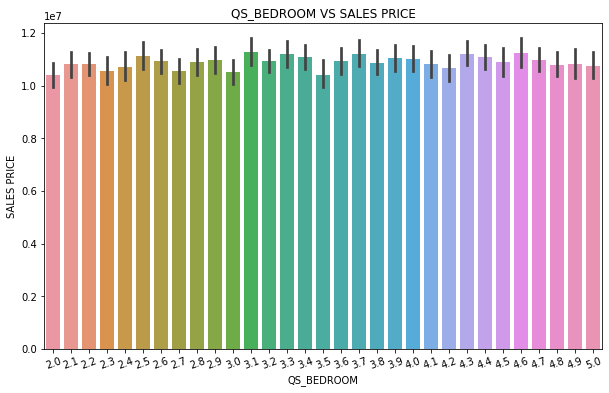

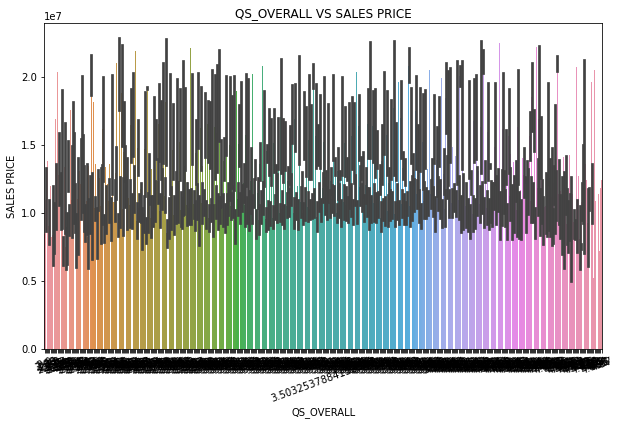

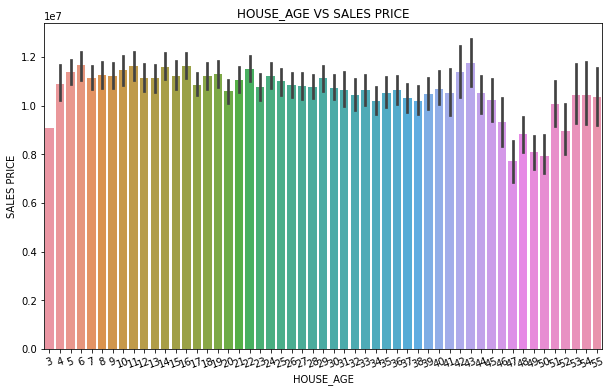

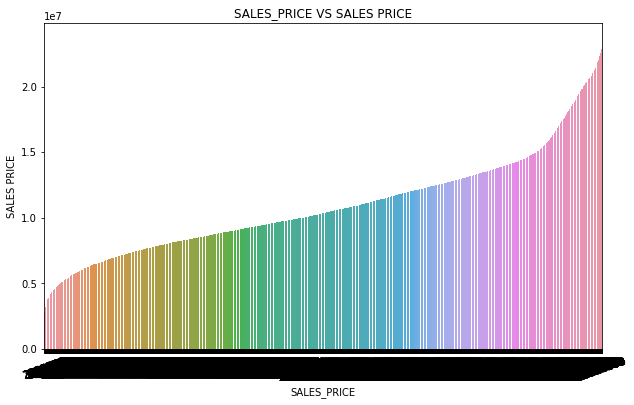

In [42]:
def feature_plot(dframe,col):
    f = plt.figure()
    f.set_figwidth(10)
    f.set_figheight(6)
    sns.barplot(x=df1[col], y=df1['SALES_PRICE'], data=df1)
    plt.xlabel(col)
    plt.ylabel("SALES PRICE")
    plt.title(col+" VS SALES PRICE")
    plt.xticks(rotation=20)
    return plt.show()
for x in df1.select_dtypes(include=['int64','float']).columns:
#for x in df1.columns: 
  feature_plot(df1,x)
  print('\n')

  


In [43]:
import plotly.express as px 
fig = px.line(df1, x="INT_SQFT", y="SALES_PRICE", title='Price based on sqft')
fig.show()

In [44]:
import plotly.express as px 
fig = px.line(df1, x="DIST_MAINROAD", y="SALES_PRICE", title='Price based on DISTMAIN ROAD')
fig.show()

#  ENCODING

In [45]:
# label encoding for area feature
df2 = df1.copy()
result = df2.groupby('AREA')['SALES_PRICE'].aggregate(np.mean).reset_index().sort_values('SALES_PRICE')['AREA']
df2['AREA'] = df2['AREA'].replace([x for x in result.values], [x for x in range(1, 8)])
df2['AREA'] = df2['AREA'].astype(np.int)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [46]:
df1.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,HOUSE_AGE,SALES_PRICE
0,Karapakkam,1004,131,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,44,7600000
1,Anna Nagar,1986,26,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,11,21717770
2,Adyar,909,70,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,20,13159200
3,Velachery,1855,14,3,2,5,Family,No,Others,NoSeWa,Paved,I,4.7,3.9,3.6,4.010,22,9630290
4,Karapakkam,1226,84,1,1,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,30,7406250


In [47]:
df2.drop('UTILITY_AVAIL',axis=1, inplace=True)
df2.drop('DIST_MAINROAD',axis=1, inplace=True)
df2.drop('SALE_COND',axis=1, inplace=True)
df2.drop('QS_ROOMS',axis=1, inplace=True)
df2.drop('QS_BATHROOM',axis=1, inplace=True)
df2.drop('QS_BEDROOM',axis=1, inplace=True)
df2.drop('QS_OVERALL',axis=1, inplace=True)


In [48]:
#df3 = df2.copy()


In [49]:
#df3.head()

In [50]:
df2.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,BUILDTYPE,STREET,MZZONE,HOUSE_AGE,SALES_PRICE
0,1,1004,1,1,3,Yes,Commercial,Paved,A,44,7600000
1,6,1986,2,1,5,No,Commercial,Gravel,RH,11,21717770
2,2,909,1,1,3,Yes,Commercial,Gravel,RL,20,13159200
3,4,1855,3,2,5,No,Others,Paved,I,22,9630290
4,1,1226,1,1,3,Yes,Others,Gravel,C,30,7406250


In [51]:
df2['PARK_FACIL'] = df2.PARK_FACIL.replace(['Yes', 'No'],[1, 0])
df2.PARK_FACIL = df2.PARK_FACIL.astype(np.int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [52]:
result = df2.groupby('STREET')['SALES_PRICE'].aggregate(np.mean).reset_index().sort_values('SALES_PRICE')['STREET']
df2['STREET'] = df2['STREET'].replace([x for x in result.values], [x for x in range(1, len(result)+1)])
df2.STREET = df2.STREET.astype(np.int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [53]:
result = df2.groupby('MZZONE')['SALES_PRICE'].aggregate(np.mean).reset_index().sort_values('SALES_PRICE')['MZZONE']
df2['MZZONE'] = df2['MZZONE'].replace([x for x in result.values], [x for x in range(1, len(result)+1)])
df2.MZZONE = df2.MZZONE.astype(np.int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [54]:
df2.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,BUILDTYPE,STREET,MZZONE,HOUSE_AGE,SALES_PRICE
0,1,1004,1,1,3,1,Commercial,2,1,44,7600000
1,6,1986,2,1,5,0,Commercial,3,4,11,21717770
2,2,909,1,1,3,1,Commercial,3,5,20,13159200
3,4,1855,3,2,5,0,Others,2,3,22,9630290
4,1,1226,1,1,3,1,Others,3,2,30,7406250


In [55]:
df3 = df2.copy()
df3.head()

#not doing one hot encoding for desicion tree to set here with build type


,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,BUILDTYPE,STREET,MZZONE,HOUSE_AGE,SALES_PRICE
0,1,1004,1,1,3,1,Commercial,2,1,44,7600000
1,6,1986,2,1,5,0,Commercial,3,4,11,21717770
2,2,909,1,1,3,1,Commercial,3,5,20,13159200
3,4,1855,3,2,5,0,Others,2,3,22,9630290
4,1,1226,1,1,3,1,Others,3,2,30,7406250


In [56]:
result = df3.groupby('BUILDTYPE')['SALES_PRICE'].aggregate(np.mean).reset_index().sort_values('SALES_PRICE')['BUILDTYPE']
df3['BUILDTYPE'] = df3['BUILDTYPE'].replace([x for x in result.values], [x for x in range(1, len(result)+1)])
df3.MZZONE = df3.MZZONE.astype(np.int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [57]:
df3.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,BUILDTYPE,STREET,MZZONE,HOUSE_AGE,SALES_PRICE
0,1,1004,1,1,3,1,3,2,1,44,7600000
1,6,1986,2,1,5,0,3,3,4,11,21717770
2,2,909,1,1,3,1,3,3,5,20,13159200
3,4,1855,3,2,5,0,2,2,3,22,9630290
4,1,1226,1,1,3,1,2,3,2,30,7406250


In [58]:
#One-Hot Encoding for BUILDTYPE  data
df2=pd.get_dummies(df2,columns=['BUILDTYPE'])
df2.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,STREET,MZZONE,HOUSE_AGE,SALES_PRICE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
0,1,1004,1,1,3,1,2,1,44,7600000,1,0,0
1,6,1986,2,1,5,0,3,4,11,21717770,1,0,0
2,2,909,1,1,3,1,3,5,20,13159200,1,0,0
3,4,1855,3,2,5,0,2,3,22,9630290,0,0,1
4,1,1226,1,1,3,1,3,2,30,7406250,0,0,1


In [59]:
df2.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'PARK_FACIL',
       'STREET', 'MZZONE', 'HOUSE_AGE', 'SALES_PRICE', 'BUILDTYPE_Commercial',
       'BUILDTYPE_House', 'BUILDTYPE_Others'],
      dtype='object')

In [60]:
df1.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'HOUSE_AGE', 'SALES_PRICE'],
      dtype='object')

In [61]:
df2=df2.reindex(columns=['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'PARK_FACIL',
       'STREET', 'MZZONE', 'HOUSE_AGE', 'BUILDTYPE_Commercial',
       'BUILDTYPE_House', 'BUILDTYPE_Others','SALES_PRICE'])
df2.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,STREET,MZZONE,HOUSE_AGE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others,SALES_PRICE
0,1,1004,1,1,3,1,2,1,44,1,0,0,7600000
1,6,1986,2,1,5,0,3,4,11,1,0,0,21717770
2,2,909,1,1,3,1,3,5,20,1,0,0,13159200
3,4,1855,3,2,5,0,2,3,22,0,0,1,9630290
4,1,1226,1,1,3,1,3,2,30,0,0,1,7406250


# SPLITING

In [62]:
X = df2.iloc[:,:-1]
y = df2.loc[:,['SALES_PRICE']]

In [63]:
X.shape, y.shape

((7109, 12), (7109, 1))

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [65]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5687, 12), (5687, 1), (1422, 12), (1422, 1))

In [66]:
X_train

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,STREET,MZZONE,HOUSE_AGE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
5599,5,2327,4,2,6,1,3,4,18,1,0,0
6404,3,893,1,1,3,0,2,6,28,0,1,0
5817,5,2180,3,2,5,0,2,5,26,0,0,1
413,3,1296,2,1,4,1,3,4,14,0,0,1
914,6,1771,1,1,4,0,2,4,42,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4931,6,1532,1,1,4,1,3,5,33,0,1,0
3264,4,1572,2,1,4,0,1,6,30,1,0,0
1653,5,2087,3,2,5,1,3,4,5,0,1,0
2607,4,1754,2,1,4,1,3,6,18,1,0,0


# Scaling

In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Linear Regression Model

In [68]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [69]:
dummy = pd.DataFrame(regressor.coef_, columns = ['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'PARK_FACIL',
       'STREET', 'MZZONE', 'HOUSE_AGE', 'BUILDTYPE_Commercial',
       'BUILDTYPE_House', 'BUILDTYPE_Others'], index=['Coefficient'])
coeff_df = dummy.T
coeff_df

,Coefficient
AREA,1.077697e+06
INT_SQFT,6.570566e+05
N_BEDROOM,-1.270066e+06
N_BATHROOM,1.180509e+05
N_ROOM,1.755865e+06
PARK_FACIL,5.264055e+05
STREET,4.028464e+05
MZZONE,8.702762e+05
HOUSE_AGE,-2.176308e+05
BUILDTYPE_Commercial,1.353120e+06


In [70]:
coeff_df = coeff_df.apply(np.absolute)

In [71]:
coeff_df['Coefficient']

AREA                    1.077697e+06
INT_SQFT                6.570566e+05
N_BEDROOM               1.270066e+06
N_BATHROOM              1.180509e+05
N_ROOM                  1.755865e+06
PARK_FACIL              5.264055e+05
STREET                  4.028464e+05
MZZONE                  8.702762e+05
HOUSE_AGE               2.176308e+05
BUILDTYPE_Commercial    1.353120e+06
BUILDTYPE_House         8.464914e+05
BUILDTYPE_Others        5.024927e+05
Name: Coefficient, dtype: float64

In [72]:
coeff_df.sort_values(['Coefficient'])

,Coefficient
N_BATHROOM,1.180509e+05
HOUSE_AGE,2.176308e+05
STREET,4.028464e+05
BUILDTYPE_Others,5.024927e+05
PARK_FACIL,5.264055e+05
INT_SQFT,6.570566e+05
BUILDTYPE_House,8.464914e+05
MZZONE,8.702762e+05
AREA,1.077697e+06
N_BEDROOM,1.270066e+06


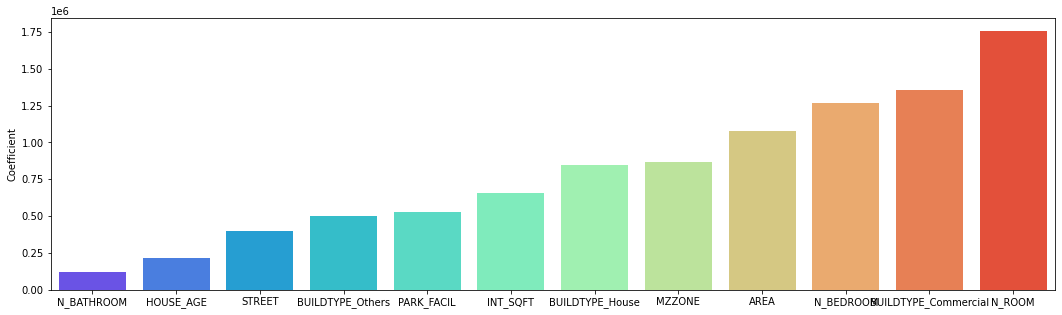

In [73]:
plt.figure(figsize=(18,5))
ax = sns.barplot(x=coeff_df.index,y = coeff_df['Coefficient'], data=coeff_df, palette = 'rainbow', order = coeff_df.sort_values(['Coefficient']).index)

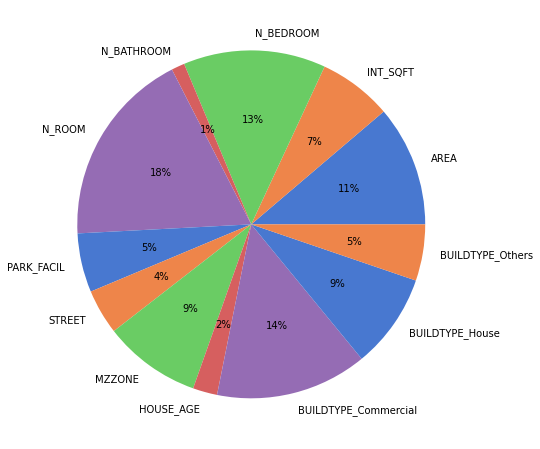

In [74]:
plt.figure(figsize=(8,8))
colors = sns.color_palette('muted')[0:5]
plt.pie(x=coeff_df['Coefficient'].values, labels = coeff_df.index, colors = colors, autopct='%.0f%%')

plt.show()

### Linear Regression - Interpretation -  1

According to the graph, N-ROOM has the highest coefficient. So N-ROOM is the most important feature.

By altering the number of rooms, bedrooms there will be a considerable change in the sales price.

And also, sellers of commercial buildings with many rooms and  bedrooms can expect a good profit.

On the other hand  Number of bathrooms ,street,house age does not have much of an impact in the sale price.


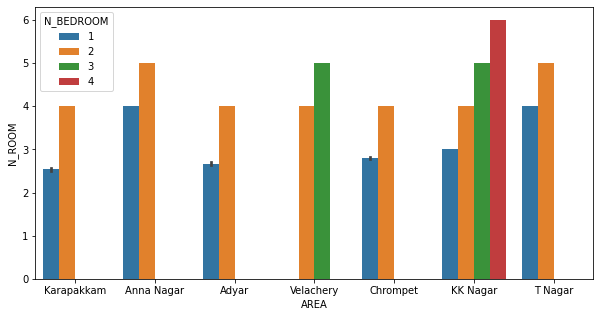

In [138]:
data1 = df2.copy()
data1.AREA = data1.AREA.map({1 : 'Karapakkam', 2 : 'Adyar', 3 : 'Chrompet', 4 : 'Velachery', 5 : 'KK Nagar', 6 : 'Anna Nagar', 7 : 'T Nagar'})
plt.figure(figsize=(10,5))
ax = sns.barplot(x="AREA", y="N_ROOM", hue="N_BEDROOM", data=data1)

### Linear Regression - Interpretation -  2


KK Nagar is the only area that has 6 rooms with 4 bedrooms.

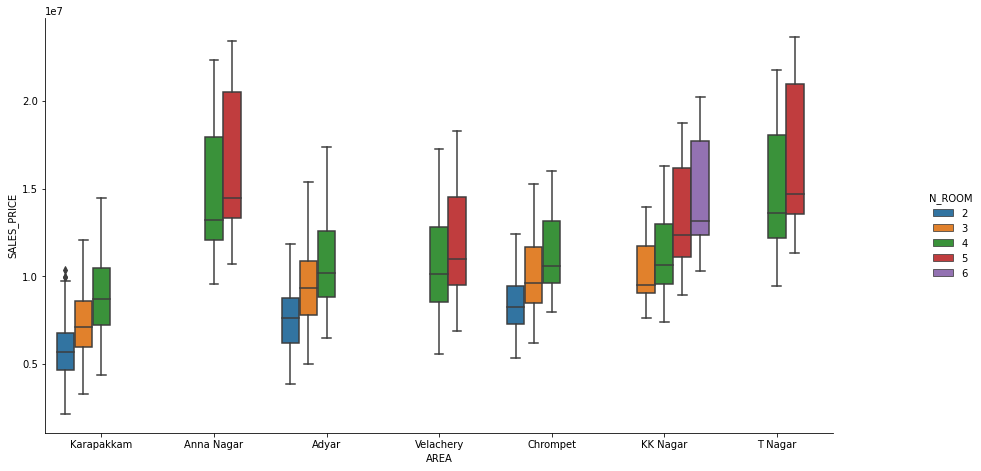

In [139]:
ax = sns.catplot(x="AREA", y="SALES_PRICE", hue="N_ROOM", data=data1,kind = 'box')
plt.gcf().set_size_inches(15, 7)

### Linear Regression - Interpretation -  3

Houses in Anna Nagar and T Nagar which has 4 rooms are costlier than houses with 6 rooms in KK nagar.

Generally,houses in Anna Nagar and T Nagar seems to be costly.

Sellers can build houses in Anna Nagar and T Nagar which will secure them more money compared to other areas.

Buyers, if they are not very particular about the location, can buy houses in karapakkam which seems to be very affrodable

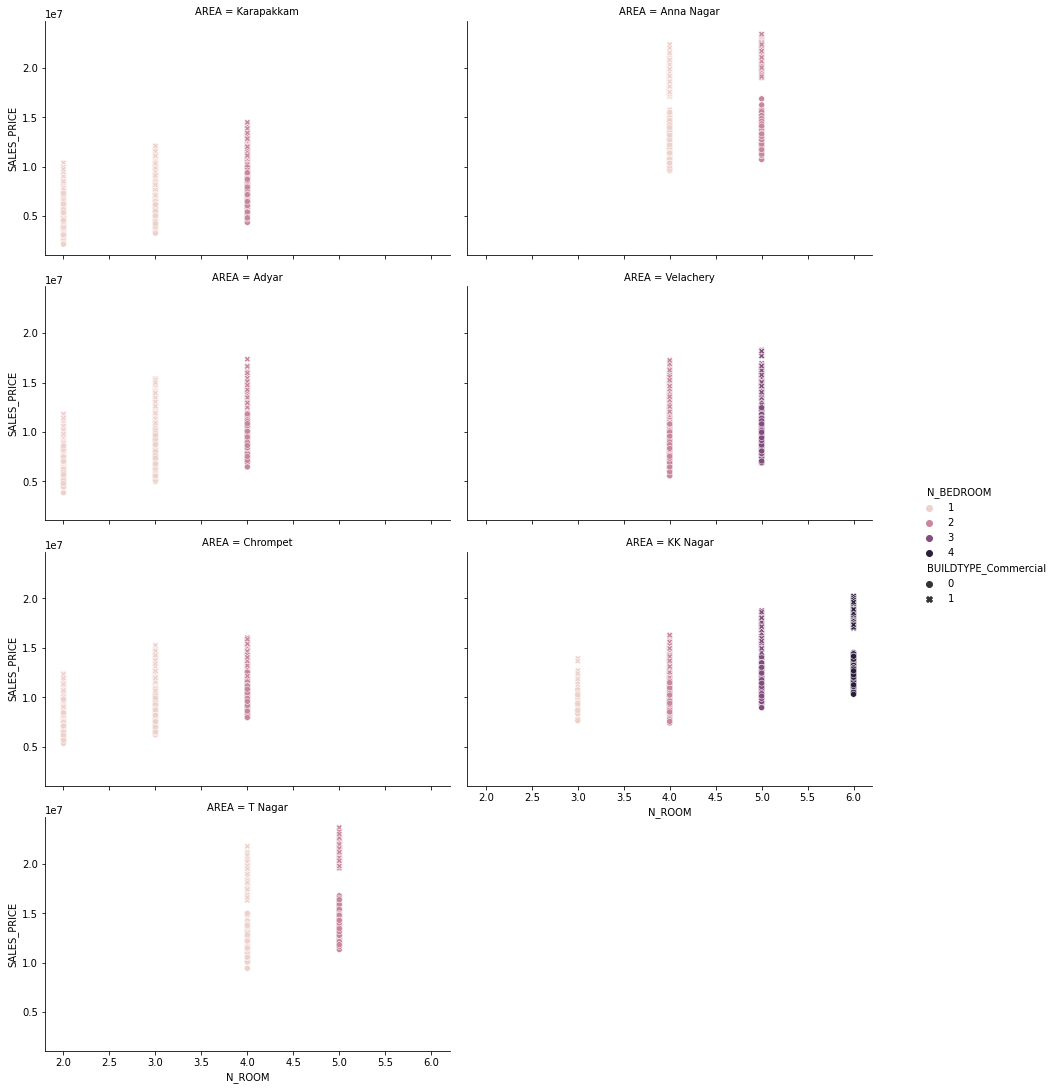

In [140]:
ax = sns.relplot(x="N_ROOM", y="SALES_PRICE", hue="N_BEDROOM", col="AREA",style = "BUILDTYPE_Commercial",col_wrap = 2,data=data1, sizes=(10, 100))
plt.gcf().set_size_inches(15, 15)

### Linear Regression - Interpretation -  4

The sale price increases when the number of rooms and number of bedroom increases but then for some areas like Anna Nagar and T Nagar sale price of a 1 and 2 bedroom houses are costlier than a 4 bedroom house in KK Nagar. So Area plays a major role in deciding the sale price than number of bedrooms.

In general, Commercial properties are expensive than other buildtypes.

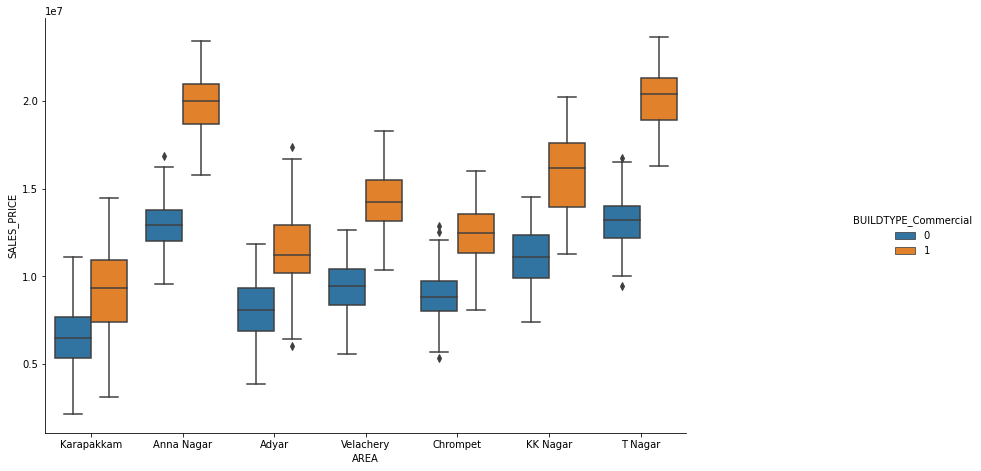

In [141]:
ax = sns.catplot(x="AREA", y="SALES_PRICE", hue="BUILDTYPE_Commercial", data=data1,kind = 'box')
plt.gcf().set_size_inches(15, 7)

### Linear Regression - Interpretation -  5


Commercial buildings in Anna Nagar and T Nagar has the highest sales price.

Sellers can build commercial buildings in Anna Nagar and T Nagar to obtain more profit.

In [79]:
regressor.coef_

array([[ 1077697.23964302,   657056.62119565, -1270066.38044616,
          118050.94789068,  1755865.01118426,   526405.549606  ,
          402846.39754062,   870276.19861521,  -217630.84318038,
         1353119.72650534,  -846491.44312762,  -502492.71412419]])

In [80]:
regressor.intercept_

array([10925361.34253561])

In [81]:
y_pred = regressor.predict(X_test)
y_pred

array([[14053005.97477535],
       [13126269.70267567],
       [18650129.31241557],
       ...,
       [13969572.31838851],
       [15762362.65343881],
       [ 8268141.88432309]])

In [82]:
from sklearn.model_selection import cross_validate
regressor = LinearRegression()

In [83]:
cv_results = cross_validate(regressor, X, y, cv=10, scoring = "r2")
cv_results['test_score'].mean()

0.9189779005309203

 METRIC R2






In [84]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.9223771217143233


# Desicion Tree - Model

In [142]:
df3.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'PARK_FACIL',
       'BUILDTYPE', 'STREET', 'MZZONE', 'HOUSE_AGE', 'SALES_PRICE'],
      dtype='object')

In [143]:
dt_data = df3.copy()

In [144]:
dt_data.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'PARK_FACIL',
       'BUILDTYPE', 'STREET', 'MZZONE', 'HOUSE_AGE', 'SALES_PRICE'],
      dtype='object')

In [145]:
dt_data.dtypes

AREA           int64
INT_SQFT       int64
N_BEDROOM      int64
N_BATHROOM     int64
N_ROOM         int64
PARK_FACIL     int64
BUILDTYPE      int64
STREET         int64
MZZONE         int64
HOUSE_AGE      int64
SALES_PRICE    int64
dtype: object

In [146]:
X_dt = dt_data.iloc[:,:-1]
y_dt = dt_data.loc[:,['SALES_PRICE']]

#### SPLITING

In [147]:
from sklearn.model_selection import train_test_split
X_dt_train, X_dt_test, y_dt_train, y_dt_test = train_test_split(X_dt, y_dt, test_size=0.2, random_state=0)

In [148]:
X_dt_train.shape, y_dt_train.shape, X_dt_test.shape, y_dt_test.shape

((5687, 10), (5687, 1), (1422, 10), (1422, 1))

In [149]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()

dt.fit(X_dt_train, y_dt_train)
dt.predict(X_dt_test)
y_dt_pred = dt.predict(X_dt_test)

In [150]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_dt_test,y_dt_pred))

R2- SCORE: 0.975572089129548


### To control the overfitting
  

In [190]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
import numpy as np

for depth in [1,2,3,4,5,6,7,8,9,10,20,30,40,50]:
    dt = DecisionTreeRegressor(max_depth=depth,random_state = 0) 
    dt.fit(X_dt_train, y_dt_train)
    trainAccuracy = metrics.r2_score(y_train, dt.predict(X_dt_train))
    dt = DecisionTreeRegressor(max_depth=depth, random_state = 0)
    valAccuracy = cross_val_score(dt, X_dt_train, y_dt_train, cv=10, scoring = make_scorer(metrics.r2_score))
    print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.36345605867188013  Cross val score :  0.36162036447194124
Depth  :  2  Training Accuracy :  0.6816800365079163  Cross val score :  0.6805303832546072
Depth  :  3  Training Accuracy :  0.8045597243268386  Cross val score :  0.8031246307797796
Depth  :  4  Training Accuracy :  0.8874015748201463  Cross val score :  0.8828961946559559
Depth  :  5  Training Accuracy :  0.922369797446146  Cross val score :  0.9150651865194004
Depth  :  6  Training Accuracy :  0.944328232459664  Cross val score :  0.9359555600296584
Depth  :  7  Training Accuracy :  0.9599455521074666  Cross val score :  0.9506142771000183
Depth  :  8  Training Accuracy :  0.9726939472603984  Cross val score :  0.9599043967191141
Depth  :  9  Training Accuracy :  0.9824193005643329  Cross val score :  0.9669839920611152
Depth  :  10  Training Accuracy :  0.989232273580311  Cross val score :  0.9709350681533243
Depth  :  20  Training Accuracy :  0.9999980817188505  Cross val score :  0.9736

In [152]:
#Depth = 20 has the best cross_val score which is 0.974  

### Desicion Tree - Interpretion 1 - Feature Importance 

In [192]:
from matplotlib import pyplot
dt = DecisionTreeRegressor(max_depth = 20, random_state = 0)
dt.fit(X_dt_train, y_dt_train)
importance = dt.feature_importances_

#Calculating feature importance based on Information Gain:
list(zip(importance,X_dt_test.columns))

[(0.48677107556475724, 'AREA'),
 (0.11551466989351443, 'INT_SQFT'),
 (0.0001146900585675117, 'N_BEDROOM'),
 (0.000928348965874052, 'N_BATHROOM'),
 (8.223775255906868e-05, 'N_ROOM'),
 (0.015391475655598019, 'PARK_FACIL'),
 (0.3236840237460926, 'BUILDTYPE'),
 (0.011750287200929816, 'STREET'),
 (0.03936616444195337, 'MZZONE'),
 (0.006397026720153952, 'HOUSE_AGE')]

In [193]:
df_features = pd.DataFrame(list(zip(importance,X_dt_test.columns)), columns = ['importance', 'features'])
df_features

,importance,features
0,0.486771,AREA
1,0.115515,INT_SQFT
2,0.000115,N_BEDROOM
3,0.000928,N_BATHROOM
4,0.000082,N_ROOM
5,0.015391,PARK_FACIL
6,0.323684,BUILDTYPE
7,0.011750,STREET
8,0.039366,MZZONE
9,0.006397,HOUSE_AGE


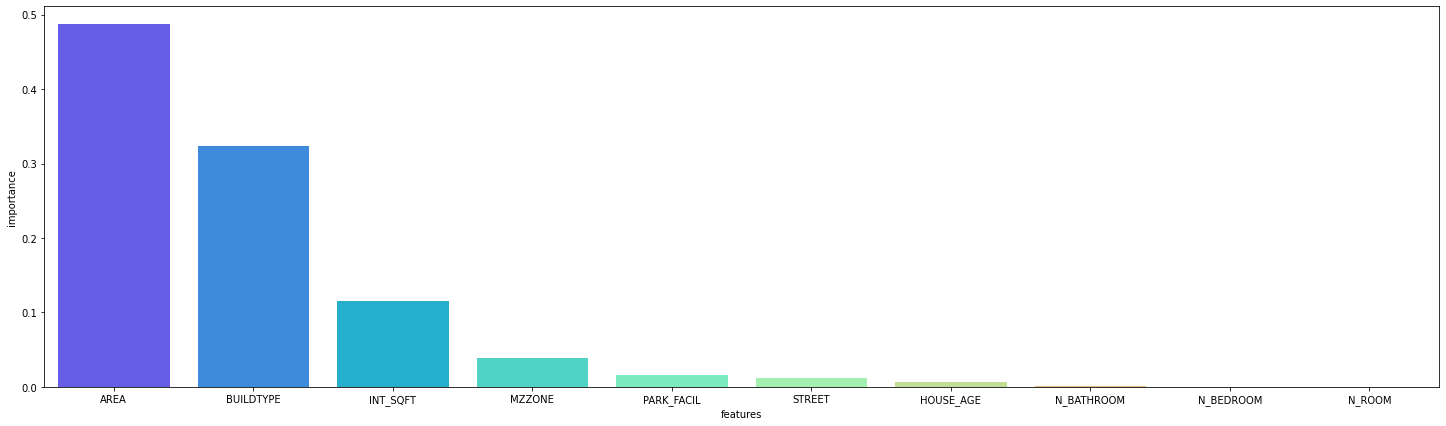

In [194]:
plt.figure(figsize=(25,7))
ax = sns.barplot(x=df_features.features,y = df_features.importance, data=df_features, palette = 'rainbow', order = df_features.sort_values(['importance'],ascending = False).features)

### Desicion Tree - Interpretion 2 - Feature Importance 
According to the decision tree model, the most important features are AREA, BUILDTYPE, INT_SQFT and MZZZONE

Features such as N_BEDROOM, N_ROOM, QS_ROOMS, QS_OVERALL, QS_BEDROOM, QS_BATHROOM, DIST_MAINROAD, UTILITY AVAIL doesnt have much of an impact in predicting the SALES_PRICE

In [195]:
### Plotting the decision tree

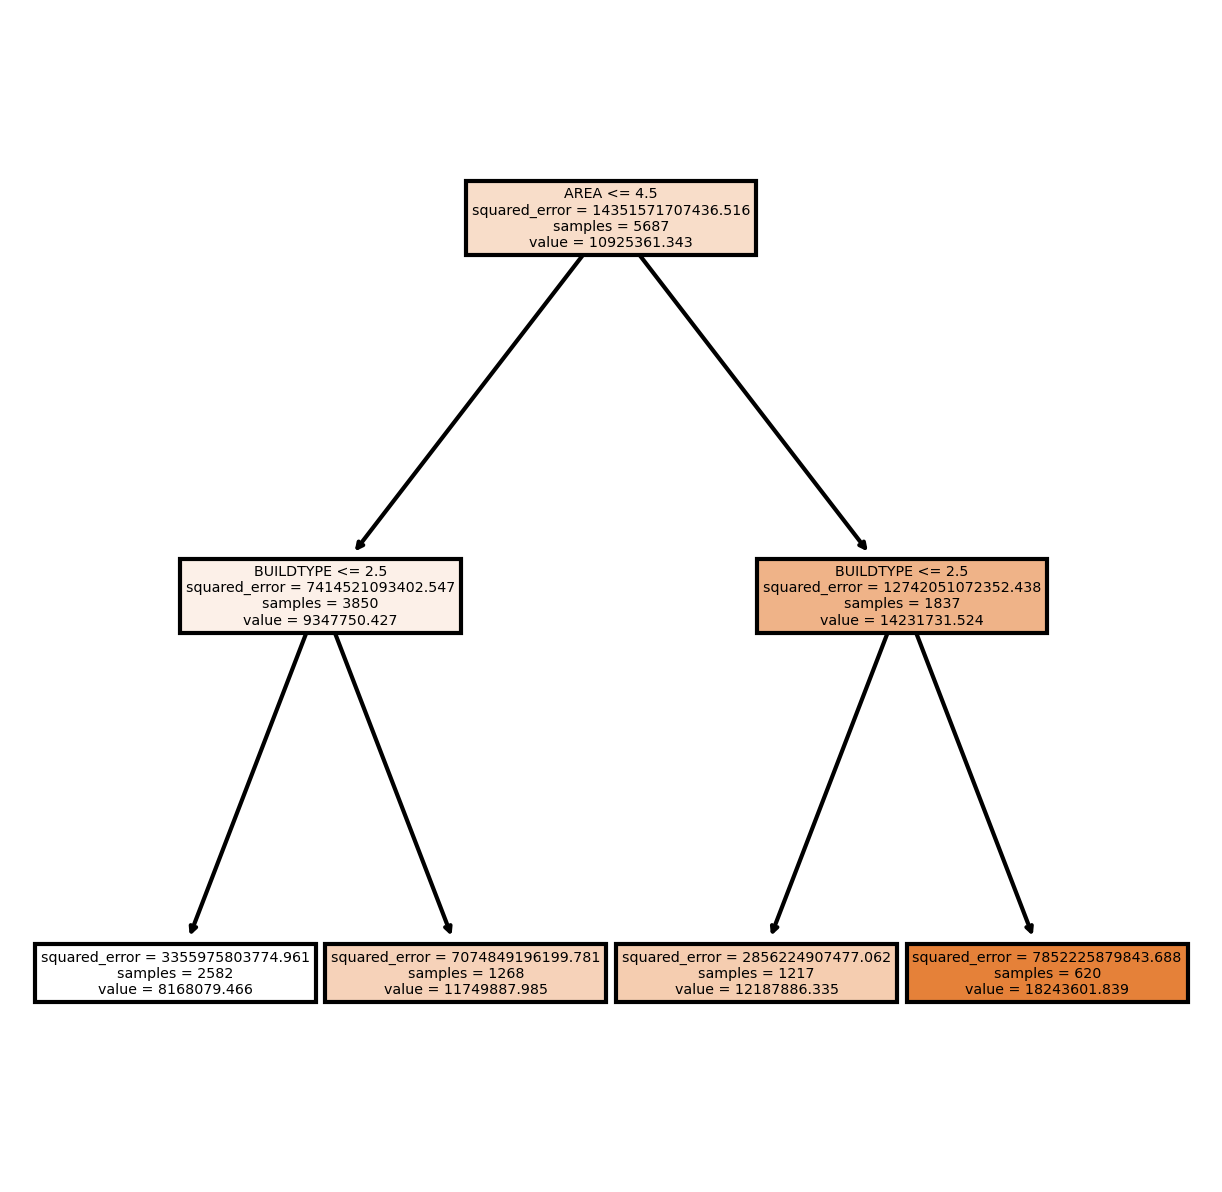

In [226]:
from sklearn import tree
dt = DecisionTreeRegressor(max_depth = 2, random_state = 0)
dt.fit(X_dt_train, y_dt_train)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
tree.plot_tree(dt, feature_names = X_dt_test.columns, filled = True)
plt.show()

# Random Forest - Model

### Pre processing

In [198]:
X_rf = dt_data.iloc[:,:-1]
y_rf = dt_data.loc[:,['SALES_PRICE']]

In [199]:
X_rf_list = list(X_rf.columns)
X_rf_list

['AREA',
 'INT_SQFT',
 'N_BEDROOM',
 'N_BATHROOM',
 'N_ROOM',
 'PARK_FACIL',
 'BUILDTYPE',
 'STREET',
 'MZZONE',
 'HOUSE_AGE']

### Splitting


In [201]:
from sklearn.model_selection import train_test_split
X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X_rf, y_rf, test_size=0.2, random_state=0)

In [203]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators= 100, max_depth = 4, max_features='sqrt')
rf.fit(X_rf_train,np.ravel(y_rf_train))
y_rf_pred = rf.predict(X_rf_test)

### Metrics

In [227]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_rf_test,y_rf_pred))

R2- SCORE: 0.8886319909290203


### Constructing the tree

In [228]:
from sklearn.tree import export_graphviz
import pydot

tree = rf.estimators_[5]
export_graphviz(tree, out_file = 'tree.dot', feature_names = X_rf_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

In [229]:
print('The depth of this tree is:', tree.tree_.max_depth)

The depth of this tree is: 4


In [230]:
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3, random_state=42)
rf_small.fit(X_rf, np.ravel(y_rf))

tree_small = rf_small.estimators_[5]
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = X_rf_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png')

### Random forest - Interpretation 1 - Feature importance

In [209]:
importances = list(rf.feature_importances_)

feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X_rf_list, importances)]

feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: AREA                 Importance: 0.31
Variable: BUILDTYPE            Importance: 0.3
Variable: INT_SQFT             Importance: 0.15
Variable: N_ROOM               Importance: 0.13
Variable: MZZONE               Importance: 0.06
Variable: N_BEDROOM            Importance: 0.03
Variable: N_BATHROOM           Importance: 0.01
Variable: PARK_FACIL           Importance: 0.01
Variable: STREET               Importance: 0.0
Variable: HOUSE_AGE            Importance: 0.0


In [210]:
df_rf_feature_importances = pd.DataFrame(feature_importances, columns = ['features','importance'])
df_rf_feature_importances

,features,importance
0,AREA,0.31
1,BUILDTYPE,0.30
2,INT_SQFT,0.15
3,N_ROOM,0.13
4,MZZONE,0.06
5,N_BEDROOM,0.03
6,N_BATHROOM,0.01
7,PARK_FACIL,0.01
8,STREET,0.00
9,HOUSE_AGE,0.00


# Modelling with 5 important features

In [231]:
rf_most_important = RandomForestRegressor(n_estimators= 100, max_depth = 4, max_features='sqrt')

important_indices = [X_rf_list.index('AREA'), X_rf_list.index('BUILDTYPE'), X_rf_list.index('INT_SQFT'), X_rf_list.index('N_ROOM'),X_rf_list.index('MZZONE')]
train_important = X_rf_train.iloc[:, important_indices]
test_important = X_rf_test.iloc[:, important_indices]

rf_most_important.fit(train_important, np.ravel(y_rf_train))

predictions = rf_most_important.predict(test_important)

print('R2- SCORE:', metrics.r2_score(y_rf_test,predictions))

R2- SCORE: 0.9072342611950327


Initially the r2 score for the random forest model was 0.88. 

But, after modelling with only 5 important features the accuracy is increased to 0.90 

# XG BOOST MODEL

### Pre processing

In [212]:
X_xg = df2.iloc[:,:-1]
y_xg = df2.loc[:,['SALES_PRICE']]

### Splitting


In [214]:
from sklearn.model_selection import train_test_split
X_xg_train, X_xg_test, y_xg_train, y_xg_test = train_test_split(X_xg, y_xg, test_size=0.2, random_state=0)

In [215]:
X_xg_train.shape, X_xg_test.shape, y_xg_train.shape, y_xg_test.shape

((5687, 12), (1422, 12), (5687, 1), (1422, 1))

In [216]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Modelling

In [217]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
    model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0) 
    model.fit(X_xg_train,y_xg_train) 
    model.score(X_xg_test, y_xg_test) 
    print("Learning rate : ", lr, " Train score : ", model.score(X_xg_train,y_xg_train), " Cross-Val score : ", np.mean(cross_val_score(model, X_xg_train,y_xg_train, cv=10)))

Learning rate :  0.01  Train score :  -0.3757160751350299  Cross-Val score :  -0.3826207990744903
Learning rate :  0.02  Train score :  0.7468745062209117  Cross-Val score :  0.7438281855427318
Learning rate :  0.03  Train score :  0.925212465932328  Cross-Val score :  0.9226690027253653
Learning rate :  0.04  Train score :  0.9624971443007466  Cross-Val score :  0.9603507861239757
Learning rate :  0.05  Train score :  0.9746840261075183  Cross-Val score :  0.972524616783422
Learning rate :  0.06  Train score :  0.980277385700544  Cross-Val score :  0.9787397145457135
Learning rate :  0.07  Train score :  0.9845545696704794  Cross-Val score :  0.9829839523504662
Learning rate :  0.08  Train score :  0.9874951857914912  Cross-Val score :  0.9858823042198406
Learning rate :  0.09  Train score :  0.9890247865851128  Cross-Val score :  0.9879705691978289
Learning rate :  0.1  Train score :  0.9904162014034902  Cross-Val score :  0.9893353972840373
Learning rate :  0.11  Train score :  0.99

The best learning rate is 0.7 because it has the highest cross-val score - 0.9929

### Fitting the model with best learning rate


In [218]:
model = xgb.XGBRegressor(learning_rate = 0.7, n_estimators=100)
model.fit(X_xg_train,y_xg_train) #train the model
y_xg_pred = model.predict(X_xg_test)
print(model.score(X_xg_test, y_xg_test))

[16:06:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.9935310559151198


### Metrics


In [232]:
print('R2- SCORE:', metrics.r2_score(y_xg_test,y_xg_pred))

R2- SCORE: 0.9935310559151198


### XG BOOST - Interpretation  1- Feature importance

In [220]:
xg_importances = list(model.feature_importances_)
xg_feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X_rf_list, xg_importances)]

xg_feature_importances = sorted(xg_feature_importances, key = lambda x: x[1], reverse = True)

[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in xg_feature_importances];

Variable: HOUSE_AGE            Importance: 0.44999998807907104
Variable: AREA                 Importance: 0.3400000035762787
Variable: PARK_FACIL           Importance: 0.07000000029802322
Variable: INT_SQFT             Importance: 0.029999999329447746
Variable: STREET               Importance: 0.029999999329447746
Variable: BUILDTYPE            Importance: 0.019999999552965164
Variable: N_BEDROOM            Importance: 0.009999999776482582
Variable: N_BATHROOM           Importance: 0.009999999776482582
Variable: N_ROOM               Importance: 0.0
Variable: MZZONE               Importance: 0.0


In [233]:
xg_feature_importances = pd.DataFrame(xg_feature_importances, columns = ['features','importance'])
xg_feature_importances

,features,importance
0,HOUSE_AGE,0.45
1,AREA,0.34
2,PARK_FACIL,0.07
3,INT_SQFT,0.03
4,STREET,0.03
5,BUILDTYPE,0.02
6,N_BEDROOM,0.01
7,N_BATHROOM,0.01
8,N_ROOM,0.00
9,MZZONE,0.00


# Feature importance graphs


### XG BOOST

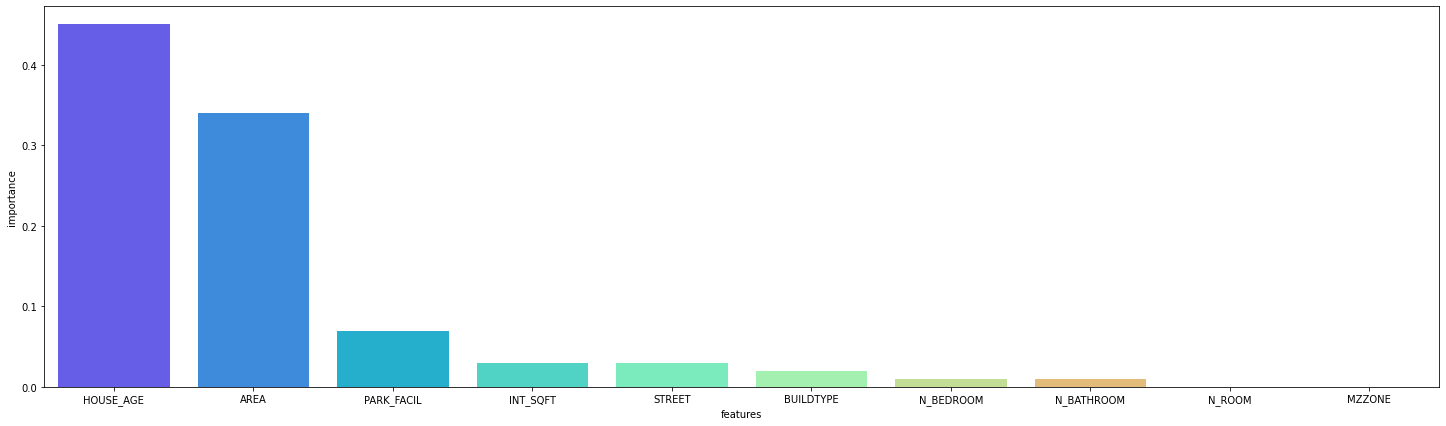

In [234]:
plt.figure(figsize=(25,7))
ax = sns.barplot(x=xg_feature_importances.features,y = xg_feature_importances.importance, data=xg_feature_importances, palette = 'rainbow', order = xg_feature_importances.sort_values(['importance'],ascending = False).features)

#feature_importances = pd.Series(model.feature_importances_, index=X_rf_list)
#feature_importances.nlargest(10).plot(kind='bar')

### Decision tree

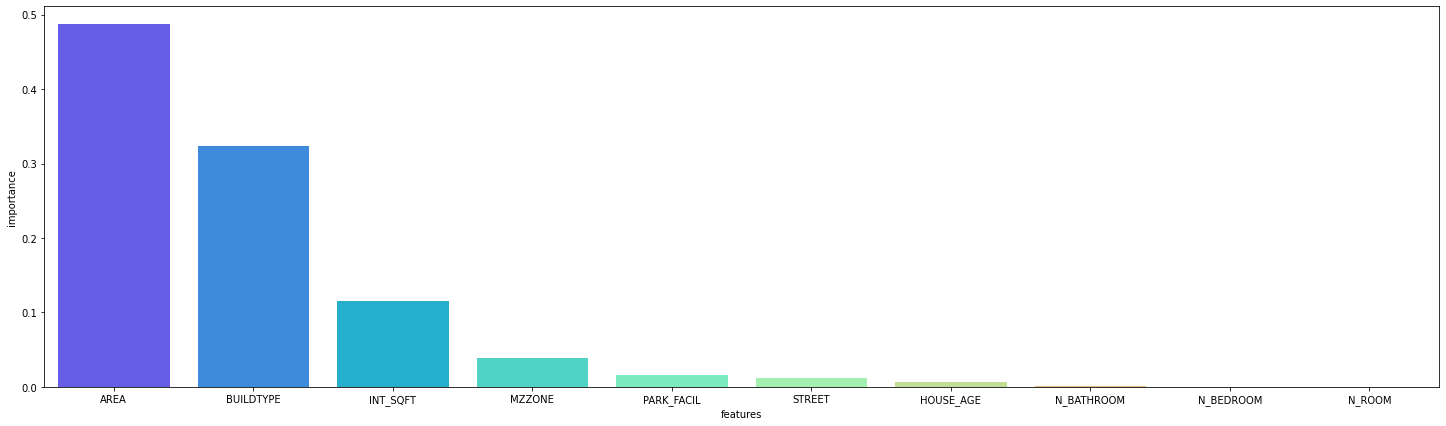

In [223]:
plt.figure(figsize=(25,7))
ax = sns.barplot(x=df_features.features,y = df_features.importance, data=df_features, palette = 'rainbow', order = df_features.sort_values(['importance'],ascending = False).features)

### Random forest

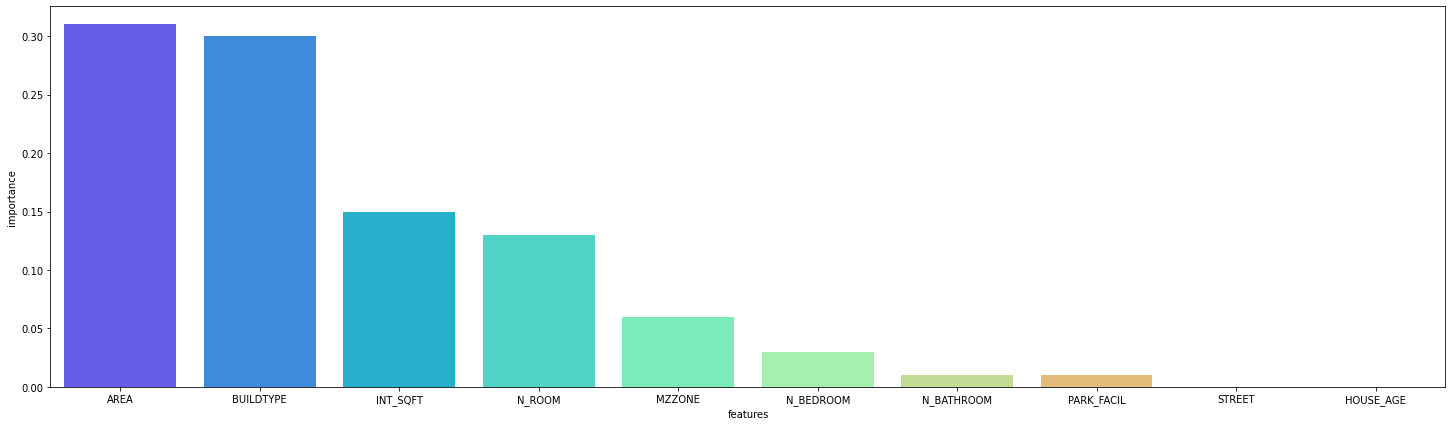

In [224]:

plt.figure(figsize=(25,7))
ax = sns.barplot(x=df_rf_feature_importances.features,y = df_rf_feature_importances.importance, data=df_rf_feature_importances, palette = 'rainbow', order = df_rf_feature_importances.sort_values(['importance'],ascending = False).features)

### Linear Regression

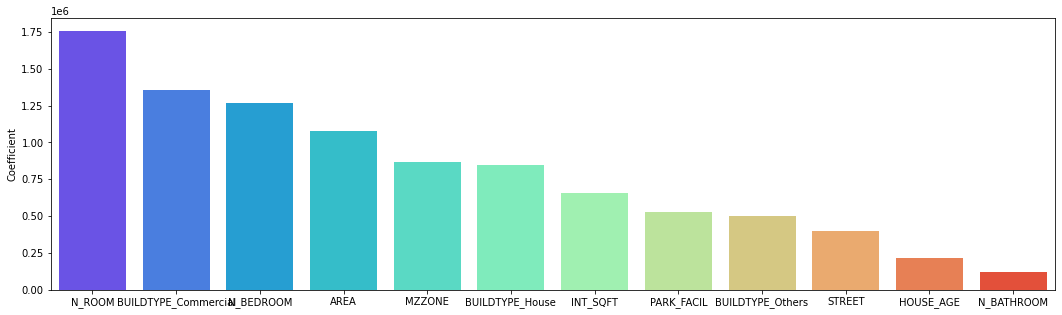

In [225]:
plt.figure(figsize=(18,5))
ax = sns.barplot(x=coeff_df.index,y = coeff_df['Coefficient'], data=coeff_df, palette = 'rainbow', order = coeff_df.sort_values(['Coefficient'],ascending = False).index)

# FINAL INFERENCE

1. FEATURE IMPORTANCE

* After analysing the feature importance of all the models, below are the features that are most important to predict the SALES_PRICE.
    * BUILDTYPE
    * AREA
    * INT_SQFT
    * N_ROOM
    * N_BEDROOM
    * MZZONE
    
2. MODEL SELECTION

* After analysing the r2_score of all the models, XG BOOST has the highest accuracy - 0.993.

* XG BOOST is the best suited model for this problem.

3. Advice to SELLERS

* Sellers of commercial buildings with many rooms and  bedrooms can expect a good profit

* also by altering the number of rooms, bedrooms there will be a considerable change in the sales price so high price can expect a good profit

* Commercial buildings in Anna Nagar and T Nagar has the highest sales price.

* Sellers can build commercial buildings in Anna Nagar and T Nagar to obtain more profit.

* Sellers of Commercial buildings in the Anna Nagar and T Nagar Residential area with more than 4 rooms and 3 bedrooms are likely to get more profit.


4. Advice to BUYERS

* Buyers, if they are not very particular about the location, can buy houses in karapakkam which seems to be very affrodable